## Agrupaciones con los datos de Ecobici

### Agrupaciones

In [1]:
import pyspark

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("EcoBiciGraficas").getOrCreate()


24/10/20 13:41:54 WARN Utils: Your hostname, Shie-Hassaikai resolves to a loopback address: 127.0.1.1; using 192.168.100.17 instead (on interface wlp1s0)
24/10/20 13:41:54 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/20 13:41:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [31]:
csv_Enero = "/home/atenea/Macrodatos/Tarea Ecobici/Enero.csv"
df_enero = spark.read.csv(csv_Enero, sep=",",header=True, inferSchema=True)

csv_Febrero = "/home/atenea/Macrodatos/Tarea Ecobici/Febrero.csv"
df_febrero = spark.read.csv(csv_Febrero,sep=",", header=True, inferSchema=True)

csv_Marzo ="/home/atenea/Macrodatos/Tarea Ecobici/Marzo.csv"
df_marzo = spark.read.csv(csv_Marzo,sep=",",header=True,inferSchema=True)

csv_Abril ="/home/atenea/Macrodatos/Tarea Ecobici/Abril.csv"
df_abril = spark.read.csv(csv_Abril,sep=",",header=True,inferSchema=True)

csv_Mayo ="/home/atenea/Macrodatos/Tarea Ecobici/Mayo.csv"
df_mayo = spark.read.csv(csv_Mayo,sep=",",header=True,inferSchema=True)

csv_Junio ="/home/atenea/Macrodatos/Tarea Ecobici/Junio.csv"
df_junio = spark.read.csv(csv_Junio,sep=",",header=True,inferSchema=True)

csv_Julio ="/home/atenea/Macrodatos/Tarea Ecobici/Julio.csv"
df_julio = spark.read.csv(csv_Julio,sep=",",header=True,inferSchema=True)

csv_Agosto ="/home/atenea/Macrodatos/Tarea Ecobici/Agosto.csv"
df_agosto = spark.read.csv(csv_Agosto,sep=",",header=True,inferSchema=True)

csv_Septiembre ="/home/atenea/Macrodatos/Tarea Ecobici/Septiembre.csv"
df_septiembre= spark.read.csv(csv_Septiembre,sep=",",header=True,inferSchema=True)

csv_Octubre ="/home/atenea/Macrodatos/Tarea Ecobici/Octubre.csv"
df_octubre = spark.read.csv(csv_Octubre,sep=",",header=True,inferSchema=True)

csv_Noviembre ="/home/atenea/Macrodatos/Tarea Ecobici/Noviembre.csv"
df_noviem = spark.read.csv(csv_Noviembre,sep=",",header=True,inferSchema=True)

csv_Diciembre ="/home/atenea/Macrodatos/Tarea Ecobici/Diciembre.csv"
df_diciembre = spark.read.csv(csv_Diciembre,sep=",",header=True,inferSchema=True)

In [10]:
viajes_por_estacion = df_enero.groupBy('Ciclo_Estacion_Retiro').\
    count().orderBy('Ciclo_Estacion_Retiro', ascending=True)
print(f"Viajes por estación en Enero")
viajes_por_estacion.show(100, truncate=False)


Viajes por estación en Enero
+---------------------+-----+
|Ciclo_Estacion_Retiro|count|
+---------------------+-----+
|1                    |4140 |
|2                    |1705 |
|3                    |1675 |
|4                    |1794 |
|5                    |1204 |
|6                    |2057 |
|7                    |1863 |
|8                    |1777 |
|9                    |1440 |
|10                   |2567 |
|11                   |1626 |
|12                   |1219 |
|13                   |4334 |
|14                   |1438 |
|15                   |2042 |
|16                   |2410 |
|17                   |3104 |
|18                   |3595 |
|19                   |2005 |
|20                   |1825 |
|21                   |3321 |
|22                   |1934 |
|23                   |2863 |
|24                   |2216 |
|25                   |2008 |
|26                   |1801 |
|27                   |4650 |
|28                   |2520 |
|29                   |2305 |
|30        

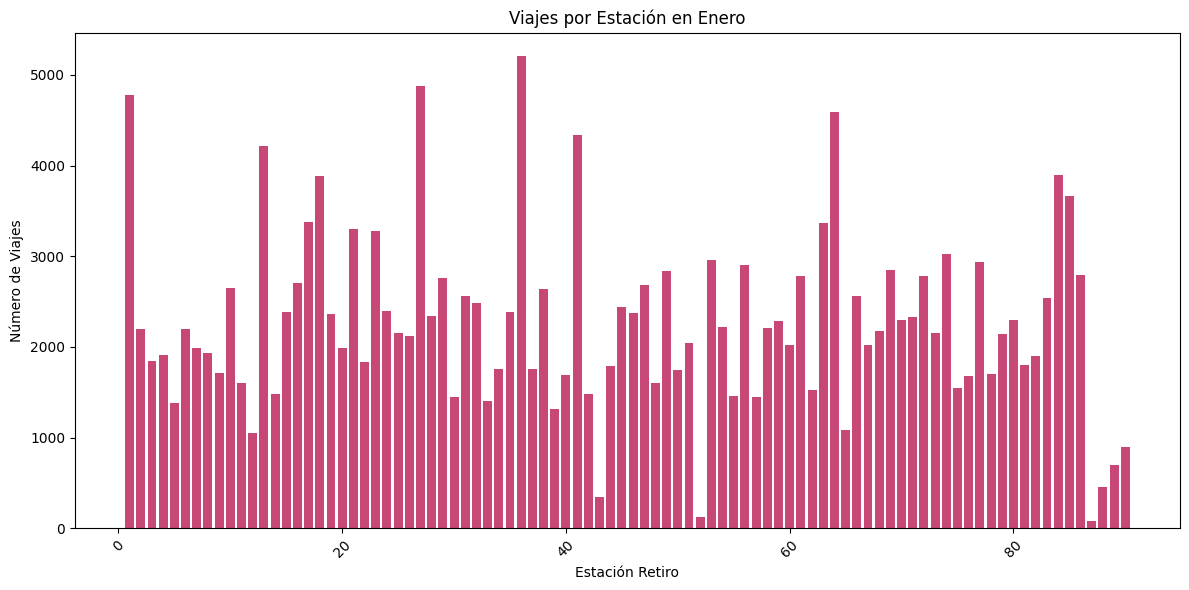

In [62]:
import matplotlib.pyplot as plt

# Obtener los datos de viajes por estación
viajes_por_estacion_data = viajes_por_estacion.collect()

# Separar los datos en listas para la gráfica
estaciones = [row.Ciclo_Estacion_Retiro for row in viajes_por_estacion_data]
cuentas = [row['count'] for row in viajes_por_estacion_data]

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.bar(estaciones, cuentas, color='#c74777')
plt.xlabel('Estación Retiro')
plt.ylabel('Número de Viajes')
plt.title('Viajes por Estación en Enero')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos

# Mostrar la gráfica
plt.show()


In [13]:
viajes_por_genero = df_noviem.groupBy('Genero_Usuario').count().orderBy('count', ascending=True)

print(f"Viajes por Género en Noviembre")
viajes_por_genero.show()


Viajes por Género en Noviembre
+--------------+------+
|Genero_Usuario| count|
+--------------+------+
|             F| 89421|
|             M|231104|
+--------------+------+



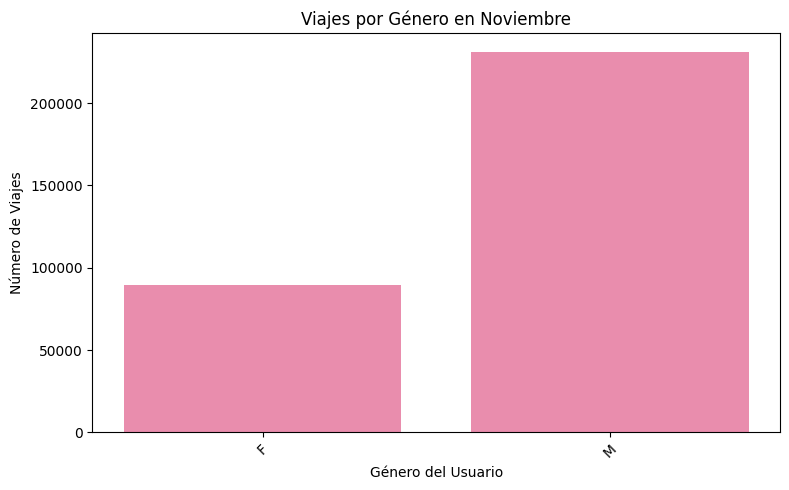

In [61]:
import matplotlib.pyplot as plt

# Obtener los datos de viajes por género
viajes_por_genero_data = viajes_por_genero.collect()

# Separar los datos en listas para la gráfica
generos = [row.Genero_Usuario for row in viajes_por_genero_data]
cuentas_genero = [row['count'] for row in viajes_por_genero_data]

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.bar(generos, cuentas_genero, color='#e98dad')
plt.xlabel('Género del Usuario')
plt.ylabel('Número de Viajes')
plt.title('Viajes por Género en Noviembre')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos

# Mostrar la gráfica
plt.show()


In [36]:
viajes_por_edad = df_marzo.groupBy('Edad_Usuario').count().orderBy('Edad_Usuario')

# Mostrar resultados
print("Viajes por edad de usuario")
viajes_por_edad.show(100, truncate=False)

Viajes por edad de usuario
+------------+-----+
|Edad_Usuario|count|
+------------+-----+
|16          |195  |
|17          |461  |
|18          |733  |
|19          |1051 |
|20          |1614 |
|21          |2556 |
|22          |3635 |
|23          |5983 |
|24          |7376 |
|25          |9508 |
|26          |10133|
|27          |12009|
|28          |10283|
|29          |10532|
|30          |10182|
|31          |9294 |
|32          |10119|
|33          |8122 |
|34          |7816 |
|35          |6115 |
|36          |6327 |
|37          |6179 |
|38          |5563 |
|39          |5007 |
|40          |4471 |
|41          |3447 |
|42          |3686 |
|43          |3512 |
|44          |3555 |
|45          |2859 |
|46          |2965 |
|47          |2923 |
|48          |2882 |
|49          |2305 |
|50          |2158 |
|51          |2190 |
|52          |2923 |
|53          |1755 |
|54          |1339 |
|55          |1744 |
|56          |1197 |
|57          |1465 |
|58          |1301 |
|59    

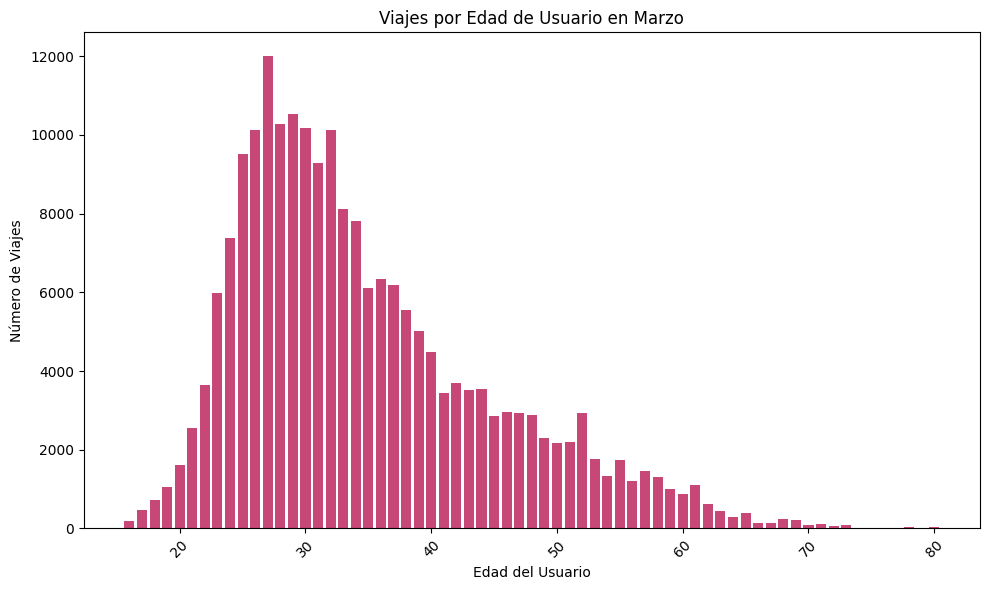

In [60]:
import matplotlib.pyplot as plt

# Obtener los datos de viajes por edad
viajes_por_edad_data = viajes_por_edad.collect()

# Separar los datos en listas para la gráfica
edades = [row.Edad_Usuario for row in viajes_por_edad_data]
cuentas_edad = [row['count'] for row in viajes_por_edad_data]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.bar(edades, cuentas_edad, color='#c74777')
plt.xlabel('Edad del Usuario')
plt.ylabel('Número de Viajes')
plt.title('Viajes por Edad de Usuario en Marzo')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos

# Mostrar la gráfica
plt.show()


In [37]:
viajes_por_edad_genero = df_septiembre.groupBy('Edad_Usuario', 'Genero_Usuario').count().orderBy('Edad_Usuario')

# Mostrar resultados
print("Viajes por edad y género en Septiembre")
viajes_por_edad_genero.show(100, truncate=False)

Viajes por edad y género en Septiembre
+------------+--------------+-----+
|Edad_Usuario|Genero_Usuario|count|
+------------+--------------+-----+
|16          |F             |4    |
|16          |M             |2    |
|17          |M             |225  |
|17          |F             |78   |
|18          |F             |89   |
|18          |M             |524  |
|19          |M             |645  |
|19          |F             |218  |
|20          |M             |853  |
|20          |F             |407  |
|21          |M             |994  |
|21          |F             |762  |
|22          |F             |886  |
|22          |M             |1813 |
|23          |F             |1327 |
|23          |M             |2525 |
|24          |M             |5069 |
|24          |F             |2076 |
|25          |F             |2941 |
|25          |M             |5439 |
|26          |F             |3368 |
|26          |M             |6537 |
|27          |F             |3216 |
|27          |M          

Viajes por grupo de edad y género en Septiembre
+----------+--------------+-----+
|Grupo_Edad|Genero_Usuario|count|
+----------+--------------+-----+
|10        |M             |1396 |
|10        |F             |389  |
|20        |F             |22387|
|20        |M             |45978|
|30        |M             |56555|
|30        |F             |23587|
|40        |M             |27425|
|40        |F             |8208 |
|50        |M             |14481|
|50        |F             |4691 |
|60        |F             |823  |
|60        |M             |4073 |
|70        |F             |81   |
|70        |M             |578  |
|80        |M             |14   |
+----------+--------------+-----+



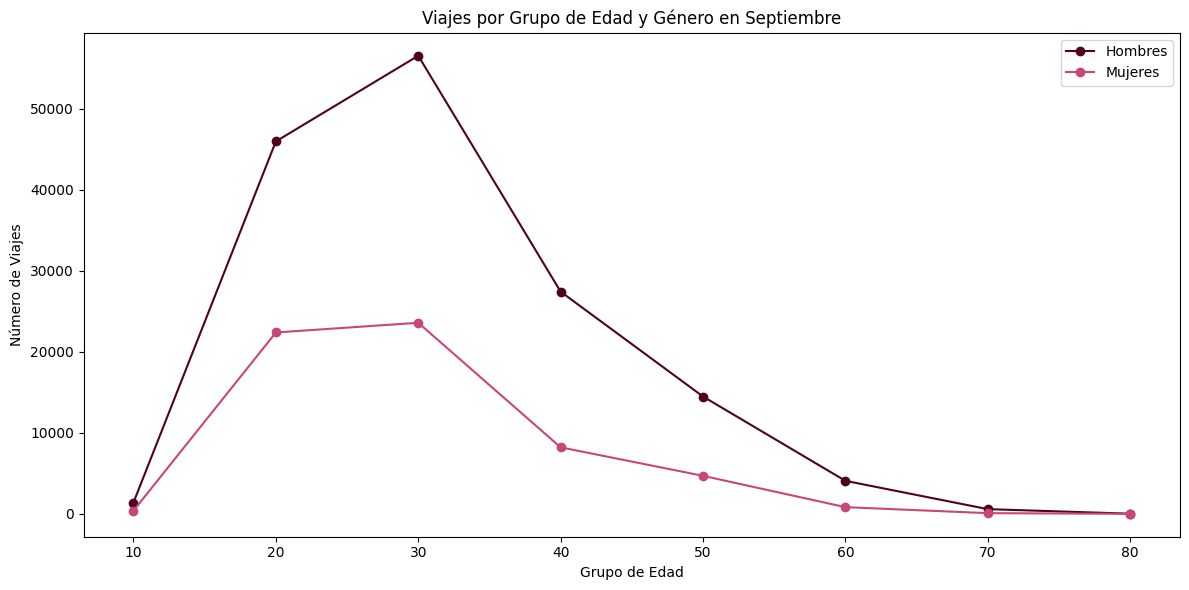

In [63]:
from pyspark.sql.functions import col, floor

# Agrupar edades en intervalos de 10
df_septiembre = df_septiembre.withColumn(
    'Grupo_Edad', (floor(col('Edad_Usuario') / 10) * 10)
)

# Agrupar por el nuevo grupo de edad y género
viajes_por_edad_genero = df_septiembre.groupBy('Grupo_Edad', 'Genero_Usuario').count().orderBy('Grupo_Edad')

# Mostrar resultados
print("Viajes por grupo de edad y género en Septiembre")
viajes_por_edad_genero.show(100, truncate=False)

# Obtener los datos de viajes por grupo de edad y género
viajes_por_edad_genero_data = viajes_por_edad_genero.collect()

# Separar los datos en listas
grupos_edad = sorted(set(row.Grupo_Edad for row in viajes_por_edad_genero_data))
generos = sorted(set(row.Genero_Usuario for row in viajes_por_edad_genero_data))

# Crear un diccionario para contar los viajes por grupo de edad y género
contar_viajes = {grupo: {genero: 0 for genero in generos} for grupo in grupos_edad}

# Llenar el diccionario con los datos
for row in viajes_por_edad_genero_data:
    contar_viajes[row.Grupo_Edad][row.Genero_Usuario] += row['count']

# Crear listas para los valores de la gráfica
valores_hombres = [contar_viajes[grupo]['M'] for grupo in grupos_edad]
valores_mujeres = [contar_viajes[grupo]['F'] for grupo in grupos_edad]

# Crear la gráfica de líneas
plt.figure(figsize=(12, 6))
plt.plot(grupos_edad, valores_hombres, marker='o', label='Hombres', color='#4f021b', linestyle='-')
plt.plot(grupos_edad, valores_mujeres, marker='o', label='Mujeres', color='#c74777', linestyle='-')

# Etiquetas y título
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Viajes')
plt.title('Viajes por Grupo de Edad y Género en Septiembre')
plt.xticks(grupos_edad)
plt.legend()

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()




In [43]:
from pyspark.sql.functions import date_format, to_date, col

# Asegúrate de que la columna Fecha_Retiro esté en formato de fecha
df_marzo = df_marzo.withColumn('Fecha_Retiro', to_date(col('Fecha_Retiro')))
df_marzo = df_marzo.withColumn('Fecha_Arribo', to_date(col('Fecha_Arribo')))

# Agrupar por fecha de retiro, fecha de arribo y estación de retiro
viajes_por_dia_y_estacion = df_marzo.groupBy(
    'Fecha_Retiro', 'Fecha_Arribo', 'Ciclo_Estacion_Retiro'
).count().orderBy('Fecha_Arribo')

# Mostrar resultados
print("Viajes por día y estación de retiro y arribo")
viajes_por_dia_y_estacion.show(100,truncate=False)

Viajes por día y estación de retiro y arribo
+------------+------------+---------------------+-----+
|Fecha_Retiro|Fecha_Arribo|Ciclo_Estacion_Retiro|count|
+------------+------------+---------------------+-----+
|2012-03-01  |2012-03-01  |49                   |103  |
|2012-03-01  |2012-03-01  |76                   |76   |
|2012-03-01  |2012-03-01  |2                    |92   |
|2012-03-01  |2012-03-01  |74                   |128  |
|2012-03-01  |2012-03-01  |88                   |18   |
|2012-03-01  |2012-03-01  |77                   |122  |
|2012-03-01  |2012-03-01  |71                   |97   |
|2012-03-01  |2012-03-01  |54                   |104  |
|2012-03-01  |2012-03-01  |33                   |44   |
|2012-03-01  |2012-03-01  |82                   |66   |
|2012-03-01  |2012-03-01  |55                   |53   |
|2012-03-01  |2012-03-01  |42                   |66   |
|2012-03-01  |2012-03-01  |12                   |35   |
|2012-03-01  |2012-03-01  |64                   |212  |
|20

Viajes por semana y estación de retiro (Top 5)
+-------------------+---------------------+-----+
|Semana_Retiro      |Ciclo_Estacion_Retiro|count|
+-------------------+---------------------+-----+
|2012-02-27 00:00:00|36                   |588  |
|2012-02-27 00:00:00|64                   |571  |
|2012-02-27 00:00:00|27                   |634  |
|2012-02-27 00:00:00|1                    |586  |
|2012-03-05 00:00:00|1                    |1070 |
|2012-03-05 00:00:00|64                   |1076 |
|2012-03-05 00:00:00|36                   |1204 |
|2012-03-05 00:00:00|27                   |1098 |
|2012-03-12 00:00:00|27                   |1127 |
|2012-03-12 00:00:00|64                   |1094 |
|2012-03-12 00:00:00|36                   |1211 |
|2012-03-12 00:00:00|1                    |1116 |
|2012-03-19 00:00:00|27                   |1035 |
|2012-03-19 00:00:00|36                   |1053 |
|2012-03-19 00:00:00|64                   |890  |
|2012-03-19 00:00:00|1                    |951  |
|20

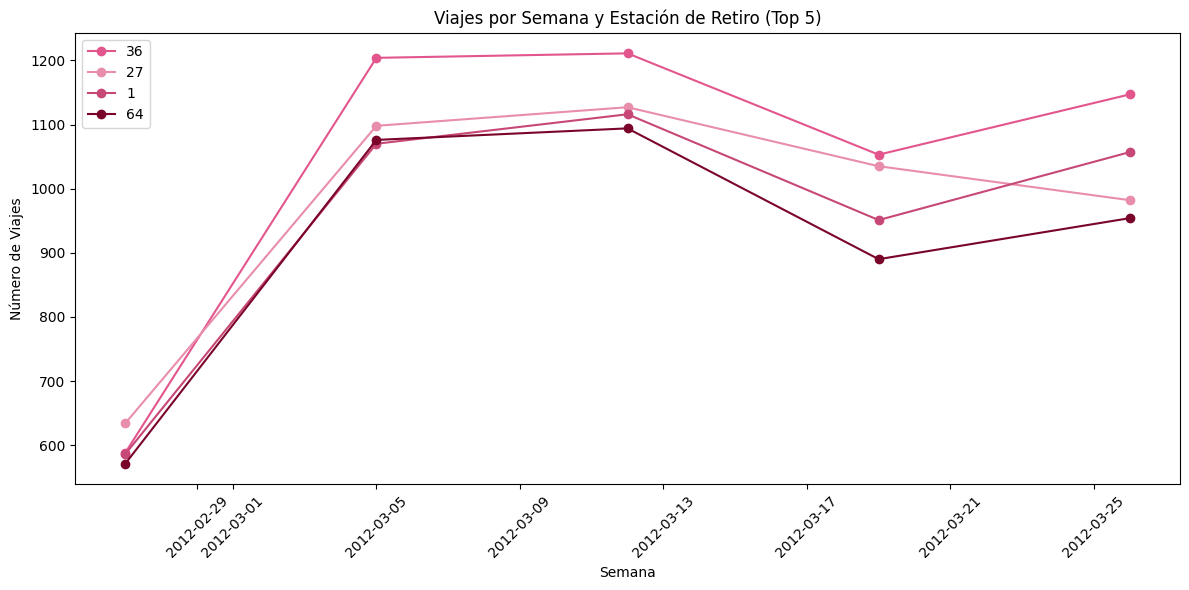

In [66]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Obtener las 5 principales estaciones por número de viajes
top_estaciones = viajes_por_semana_y_estacion.groupBy('Ciclo_Estacion_Retiro').agg(F.sum('count').alias('total')).orderBy('total', ascending=False).limit(5)

# Convertir las estaciones a una lista
top_estaciones_list = [row.Ciclo_Estacion_Retiro for row in top_estaciones.collect()]

# Agrupar solo las estaciones principales por semana
viajes_por_semana_y_estacion = df_marzo.groupBy(
    date_trunc('week', col('Fecha_Retiro')).alias('Semana_Retiro'),
    'Ciclo_Estacion_Retiro'
).agg(F.count('*').alias('count')).filter(col('Ciclo_Estacion_Retiro').isin(top_estaciones_list)).orderBy('Semana_Retiro')

# Mostrar resultados
print("Viajes por semana y estación de retiro (Top 5)")
viajes_por_semana_y_estacion.show(100, truncate=False)

# Obtener los datos para la gráfica
viajes_por_semana_y_estacion_data = viajes_por_semana_y_estacion.collect()

# Separar los datos en listas para la gráfica
semanas = sorted(set(row.Semana_Retiro for row in viajes_por_semana_y_estacion_data))
estaciones = top_estaciones_list  # Usar solo las estaciones principales

# Crear un diccionario para contar los viajes por semana y estación
contar_viajes = {semana: {estacion: 0 for estacion in estaciones} for semana in semanas}

# Llenar el diccionario con los datos
for row in viajes_por_semana_y_estacion_data:
    if row.Ciclo_Estacion_Retiro in contar_viajes[row.Semana_Retiro]:  # Verificar si la estación está en el diccionario
        contar_viajes[row.Semana_Retiro][row.Ciclo_Estacion_Retiro] += row['count']

# Crear listas para los valores de la gráfica
valores_estaciones = {estacion: [contar_viajes[semana][estacion] for semana in semanas] for estacion in estaciones}

# Crear la gráfica de líneas
plt.figure(figsize=(12, 6))
colores=['#e3558d','#e98dad','#c74777','#7a042a','4f021b']

# Graficar cada estación
for i, (estacion, valores) in enumerate(valores_estaciones.items()):
    plt.plot(semanas, valores, marker='o', label=estacion, color=colores[i % len(colores)])

# Etiquetas y título
plt.xlabel('Semana')
plt.ylabel('Número de Viajes')
plt.title('Viajes por Semana y Estación de Retiro (Top 5)')
plt.xticks(rotation=45)
plt.legend()

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

